## Lab 4: Grid Search 
1. Jose hernandez: 20053
2. Javier Mombiela: 20067
3. Pablo Gonzalez: 20362
   

In [22]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.constraints import MaxNorm

In [23]:
data = pd.read_csv("./data/Clients.csv")
data.dtypes


ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [25]:
data.shape

(30000, 25)

In [26]:
pd.set_option('display.width',100)
pd.set_option('display.precision',3)
data.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,3.000e+04,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,...,43262.949,40311.401,38871.760,5663.581,5.921e+03,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,...,64332.856,60797.156,59554.108,16563.280,2.304e+04,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,8.330e+02,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2.009e+03,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5.000e+03,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1.684e+06,896040.000,621000.000,426529.000,528666.000,1.000


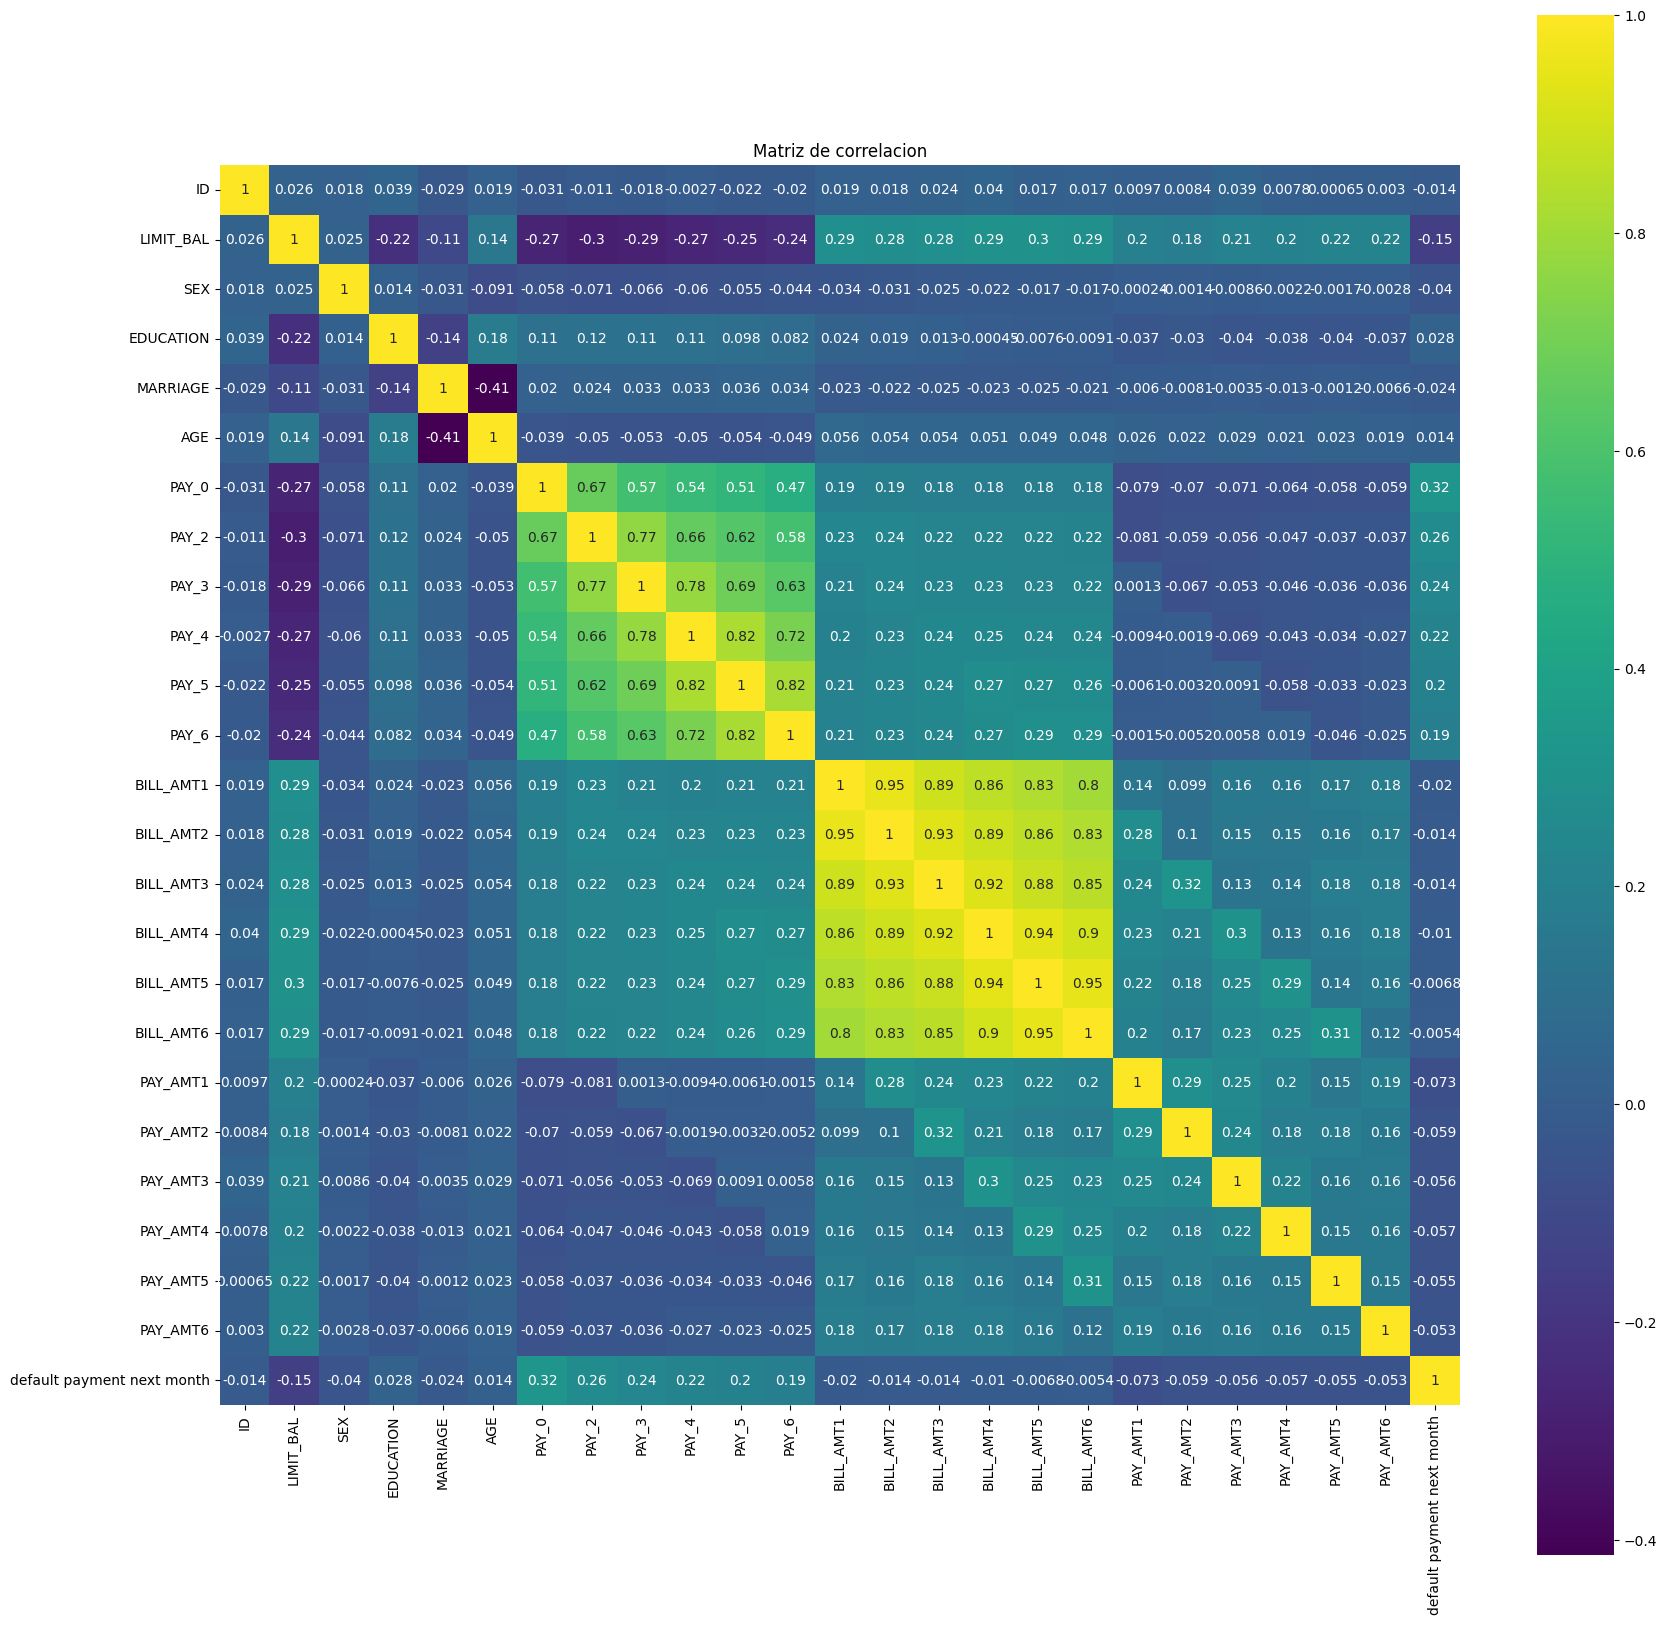

In [32]:
correlation = data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

### Correlacion de variables

In [40]:
correlation_threshold = 0.7
high_correlation_tuples = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > correlation_threshold:
            high_correlation_tuples.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

# Imprimir las tuplas de alta correlación
for tup in high_correlation_tuples:
    print(f"Tupla: {tup[0]} - {tup[1]}, Correlación: {tup[2]}")

Tupla: PAY_2 - PAY_3, Correlación: 0.7665516829341017
Tupla: PAY_3 - PAY_4, Correlación: 0.7773588733012726
Tupla: PAY_4 - PAY_5, Correlación: 0.8198353114868158
Tupla: PAY_4 - PAY_6, Correlación: 0.7164494815807845
Tupla: PAY_5 - PAY_6, Correlación: 0.8169001604176753
Tupla: BILL_AMT1 - BILL_AMT2, Correlación: 0.9514836727518136
Tupla: BILL_AMT1 - BILL_AMT3, Correlación: 0.8922785291271761
Tupla: BILL_AMT1 - BILL_AMT4, Correlación: 0.8602721890293095
Tupla: BILL_AMT1 - BILL_AMT5, Correlación: 0.8297786058330013
Tupla: BILL_AMT1 - BILL_AMT6, Correlación: 0.8026501885528455
Tupla: BILL_AMT2 - BILL_AMT3, Correlación: 0.9283262592714855
Tupla: BILL_AMT2 - BILL_AMT4, Correlación: 0.8924822912577209
Tupla: BILL_AMT2 - BILL_AMT5, Correlación: 0.859778307271445
Tupla: BILL_AMT2 - BILL_AMT6, Correlación: 0.8315935591018213
Tupla: BILL_AMT3 - BILL_AMT4, Correlación: 0.9239694565909823
Tupla: BILL_AMT3 - BILL_AMT5, Correlación: 0.8839096973620155
Tupla: BILL_AMT3 - BILL_AMT6, Correlación: 0.8533

In [39]:
# Filtrar las correlaciones de "default payment next month" con las demás variables
correlation_with_default = correlation["default payment next month"].drop("default payment next month")
print(correlation_with_default)

ID          -0.014
LIMIT_BAL   -0.154
SEX         -0.040
EDUCATION    0.028
MARRIAGE    -0.024
AGE          0.014
PAY_0        0.325
PAY_2        0.264
PAY_3        0.235
PAY_4        0.217
PAY_5        0.204
PAY_6        0.187
BILL_AMT1   -0.020
BILL_AMT2   -0.014
BILL_AMT3   -0.014
BILL_AMT4   -0.010
BILL_AMT5   -0.007
BILL_AMT6   -0.005
PAY_AMT1    -0.073
PAY_AMT2    -0.059
PAY_AMT3    -0.056
PAY_AMT4    -0.057
PAY_AMT5    -0.055
PAY_AMT6    -0.053
Name: default payment next month, dtype: float64


Variables seleccionadas
1. PAY_0        0.325
2. PAY_2        0.264
3. PAY_3        0.235
4. PAY_4        0.217
5. PAY_5        0.204
6. PAY_6        0.187

In [43]:
X = data[["PAY_0","PAY_3","PAY_5"]]
y = data[["default payment next month"]]
X = np.asarray(X)
y = np.asarray(y)

In [44]:
from sklearn.model_selection import train_test_split
#X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [64]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model = Sequential([
    Dense(64, input_shape=(3,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
]);





In [65]:
batched_model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [66]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=70, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/70
563/563 - 6s - loss: 0.5331 - accuracy: 0.7966 - val_loss: 0.4804 - val_accuracy: 0.8128 - 6s/epoch - 11ms/step
Epoch 2/70
563/563 - 2s - loss: 0.4543 - accuracy: 0.8156 - val_loss: 0.4584 - val_accuracy: 0.8160 - 2s/epoch - 3ms/step
Epoch 3/70
563/563 - 2s - loss: 0.4527 - accuracy: 0.8150 - val_loss: 0.4540 - val_accuracy: 0.8128 - 2s/epoch - 3ms/step
Epoch 4/70
563/563 - 2s - loss: 0.4500 - accuracy: 0.8171 - val_loss: 0.4558 - val_accuracy: 0.8137 - 2s/epoch - 3ms/step
Epoch 5/70
563/563 - 2s - loss: 0.4517 - accuracy: 0.8157 - val_loss: 0.4561 - val_accuracy: 0.8155 - 2s/epoch - 3ms/step
Epoch 6/70
563/563 - 2s - loss: 0.4525 - accuracy: 0.8134 - val_loss: 0.4559 - val_accuracy: 0.8095 - 2s/epoch - 3ms/step
Epoch 7/70
563/563 - 2s - loss: 0.4502 - accuracy: 0.8156 - val_loss: 0.4550 - val_accuracy: 0.8135 - 2s/epoch - 3ms/step
Epoch 8/70
563/563 - 2s - loss: 0.4512 - accuracy: 0.8162 - val_loss: 0.4598 - val_accuracy: 0.8135 - 2s/epoch - 3ms/step
Epoch 9/70
563/563 - 2s